In [1]:
"""
branch desde VerMarquetBalnce-sql-2.6.ipynb 

no es continuacion
esta vercion no tiene el metodo OpenerCloserEvaluator

implemente la clase TradePloter completamante funcional y encapsulada para todos los graficos
implementa la clase DBAdapter que encasula los metodos de bbdd

este codigo es capas de leer completamentede desde bbdd y presentar los graficos 
sin realizar ningun calculo de apertura/cierre de posiciones

prendiente:
    
    encapsular calculo de entrada salida en una clase independiente que corra periodicamante online
    crear script mail con multitread que ejecute lectura de dados y calculo de operaciones online 
"""

# imports
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
import IPython.core.debugger
dbg = IPython.core.debugger.Pdb()
#dbg.set_trace() #colocar dondo punto interrupcion

import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

comCompra = 0.29  
comVenta = 0.19 
spreadEntrada = 0.2 
spreadSalida = 0.2
deltaBaseCH = comCompra + comVenta + spreadEntrada + spreadSalida 

In [2]:
%run "../Clases/DBAdapter.py"

In [3]:
dba = DBAdapter()
dba.dbMyTradesTable = 'MyTrades'
BalanceHistory     = dba.ReadBalanceHistory()
tradesCondensation = dba.ReadCondensatedTrades()
myTrades           = dba.ReadMyTrades()

In [4]:
%run "../Clases/TradePloter.py"

Total Trades: 22
total win: -9.5, total commiciones: 19.4, Balance Final -29


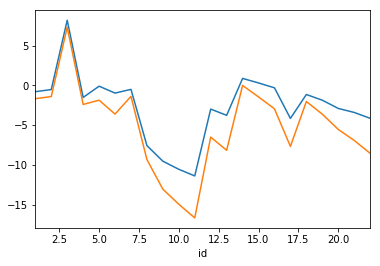

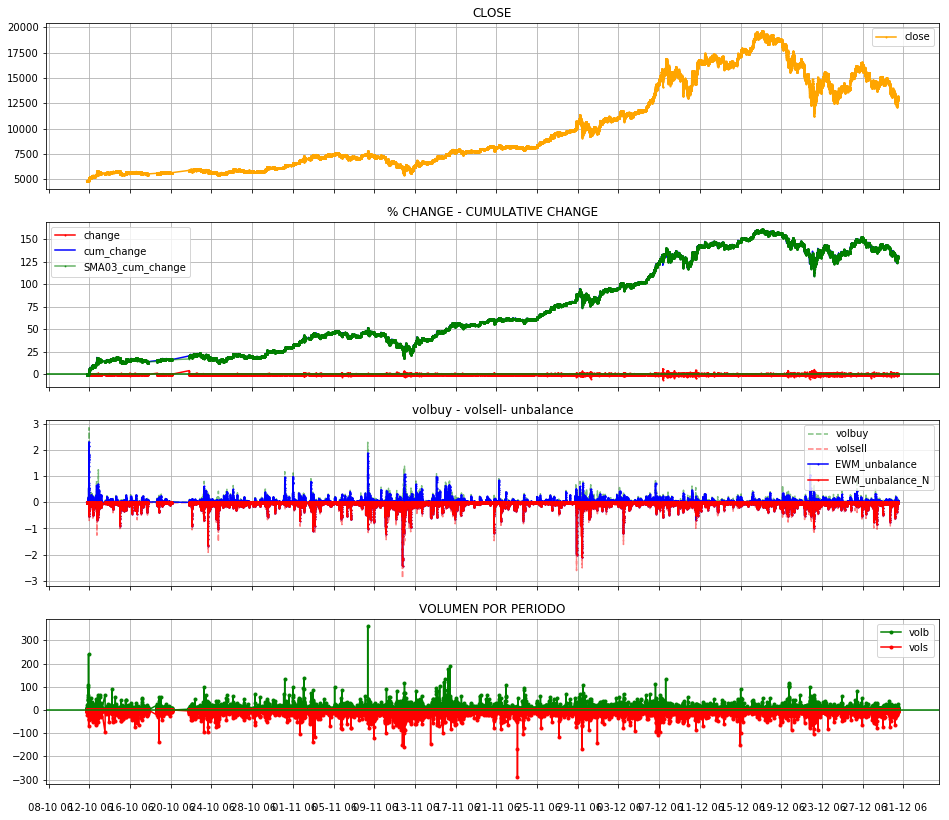

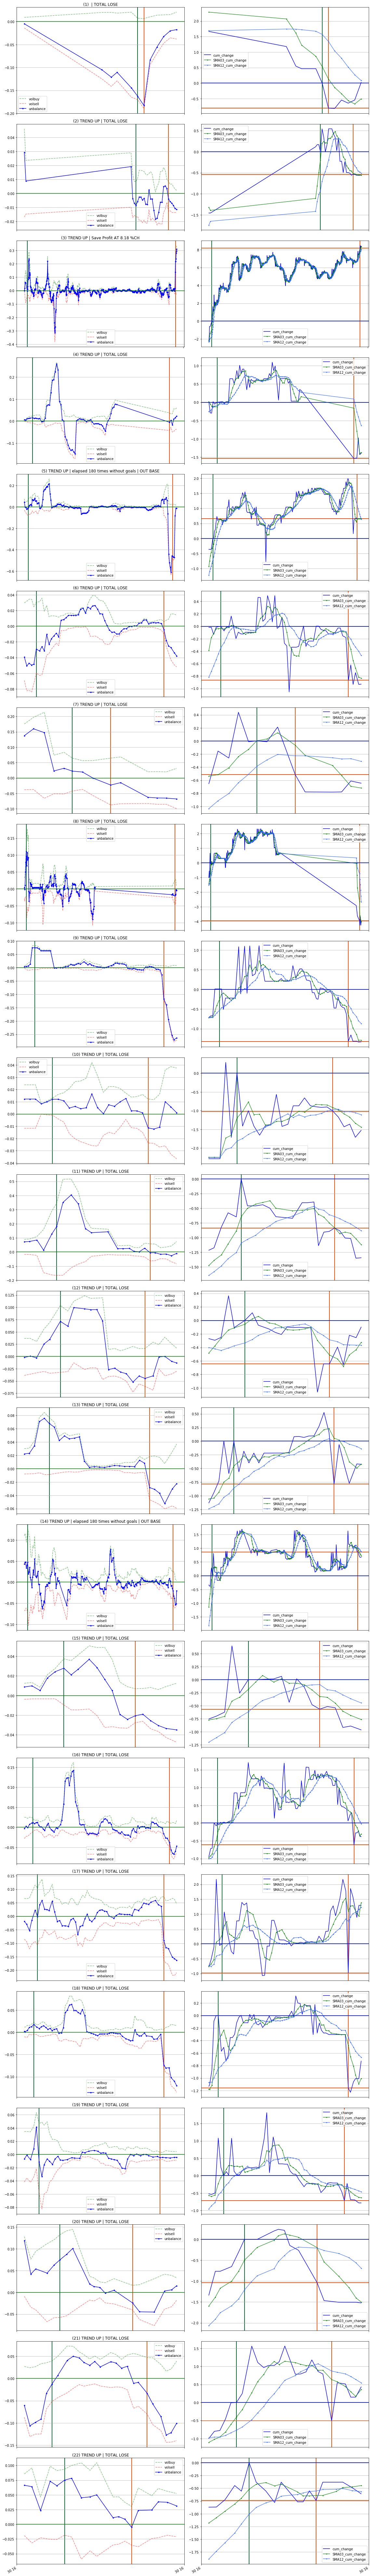

In [8]:
tp = TradePloter(deltaBaseCH, dba.windowTime)
tp.plotProfit(myTrades)
tp.plotHistory(BalanceHistory, myTrades,tradesCondensation, plotVolume= True, plotTrades=False)
tp.plotAllTrades(BalanceHistory, myTrades)


In [6]:
myTrades

,openTime,closeTime,tradeDescription,OpeningTypeID,ClosingTypeID,openingCH,baseCH,targetCH,stopLoseCH,TotalLoseCH,...,deltaCH,openingP,baseP,targetP,stopLoseP,TotalLoseP,closingP,deltaP,Profit,Profit_Gastos
id,,,,,,,,,,,,,,,,,,,,,
1,2017-12-24 12:26:51.728734,2017-12-24 12:27:51.692164,(1) | TOTAL LOSE,0,4,129.350205,130.230205,150.230205,129.230205,128.850205,...,-0.805534,13596.866250,13716.518673,16435.891923,13580.550010,13528.881919,13486.702857,-110.163393,-0.805534,-1.685534
2,2017-12-25 21:23:01.288525,2017-12-25 21:43:12.215786,(2) TREND UP | TOTAL LOSE,6,4,135.629011,136.509011,156.509011,135.509011,135.129011,...,-0.538611,14019.895906,14143.270990,16947.250172,14003.072031,13949.796427,13981.000000,-38.895906,-0.538611,-1.418611
3,2017-12-26 00:47:50.894665,2017-12-26 11:25:49.819094,(3) TREND UP | Save Profit AT 8.18 %CH,6,6,137.844775,138.724775,158.724775,137.724775,137.344775,...,8.181545,14160.600000,14285.213280,17117.333280,14143.607280,14089.797000,15555.000000,1394.400000,8.181545,7.301545
4,2017-12-26 13:19:32.610037,2017-12-26 14:57:16.804450,(4) TREND UP | TOTAL LOSE,6,4,148.838964,149.718964,169.718964,148.718964,148.338964,...,-1.529208,15996.900000,16137.672720,19337.052720,15977.703720,15916.915500,15748.600000,-248.300000,-1.529208,-2.409208
5,2017-12-27 01:19:14.860921,2017-12-27 04:21:05.332964,(5) TREND UP | elapsed 180 times without goals...,6,5,150.433282,151.313282,171.313282,150.313282,149.933282,...,0.655616,16230.000000,16372.824000,19618.824000,16210.524000,16148.850000,16331.200000,101.200000,-0.114979,-1.874979
6,2017-12-27 09:17:11.934156,2017-12-27 10:11:00.330809,(6) TREND UP | TOTAL LOSE,6,4,149.122365,150.002365,170.002365,149.002365,148.622365,...,-0.868096,16001.600000,16142.414080,19342.734080,15982.398080,15921.592000,15860.700000,-140.900000,-0.983075,-3.623075
7,2017-12-27 14:40:53.468004,2017-12-27 14:45:06.493476,(7) TREND UP | TOTAL LOSE,6,4,143.565268,144.445268,164.445268,143.445268,143.065268,...,-0.514373,15117.900000,15250.937520,18274.517520,15099.758520,15042.310500,15039.900000,-78.000000,-0.514373,-1.394373
8,2017-12-27 18:12:58.664843,2017-12-28 01:54:41.671365,(8) TREND UP | TOTAL LOSE,6,4,143.866829,144.746829,164.746829,143.746829,143.366829,...,-3.969444,15150.000000,15283.320000,18313.320000,15131.820000,15074.250000,14546.200000,-603.800000,-7.587457,-9.347457
9,2017-12-28 06:33:01.126519,2017-12-28 07:40:46.408040,(9) TREND UP | TOTAL LOSE,6,4,140.398962,141.278962,161.278962,140.278962,139.898962,...,-1.327321,14600.000000,14728.480000,17648.480000,14582.480000,14527.000000,14400.000000,-200.000000,-9.551760,-13.071760


In [7]:
done = time.time()
elapsed = (done - start)/60
print('{0} minutes'.format(round(elapsed,2)))

0.78 minutes
